In [1]:
import os 
os.getcwd()

'C:\\Users\\singh'

In [2]:
os.chdir("D:\\DS_portfolio")

In [3]:
os.getcwd()

'D:\\DS_portfolio'

In [12]:
ls

 Volume in drive D is DATA
 Volume Serial Number is A0BC-0C22

 Directory of D:\DS_portfolio

24-01-2020  22:20    <DIR>          .
24-01-2020  22:20    <DIR>          ..
24-01-2020  22:09    <DIR>          K-Nearest_Neighbors
24-01-2020  22:08    <DIR>          KNN_practice_project
               0 File(s)              0 bytes
               4 Dir(s)  273.847.574.528 bytes free


In [4]:
_author_ = "Manisha Singh"
_email_ = "singhmanisha2525@gmail.com"

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#importing train_test_split
from sklearn.model_selection import train_test_split

# Upload diabetes data 

In [6]:
diab_df = pd.read_csv("D:\\DS_portfolio\\K-Nearest_Neighbors\\diabetes.csv")

In [7]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diab_df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [9]:
diab_df.shape

(768, 9)

In [10]:
#examine outcome info
diab_df.Outcome.value_counts() / len(diab_df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Seprate feature and target variable

In [15]:
X_df =diab_df.drop('Outcome',axis=1).values
Y_df =diab_df['Outcome'].values

In [16]:
# Apply Standard Scaler to our X dataset
import sklearn.preprocessing as preproc
X_df_scaled = preproc.StandardScaler().fit_transform(X_df)
X_df_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Split train and test data

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_df_scaled,Y_df,test_size=0.2,random_state=42, stratify=Y_df)

# KNN classifier 

Using K 1-40

In [21]:
from sklearn.neighbors import KNeighborsClassifier
k = np.arange(1,30)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train, y_train)
    
    # Evaluate train performance 
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Evaluate test performance
    test_accuracy[i] = knn.score(X_test, y_test) 

train test split visualization

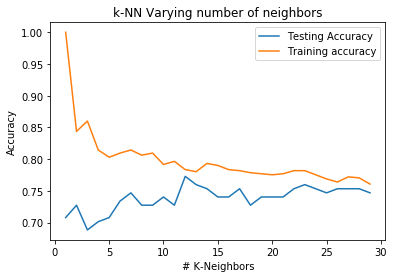

In [23]:
k = np.arange(1,30)
plt.title('k-NN Varying number of neighbors')
plt.plot(k, test_accuracy, label='Testing Accuracy')
plt.plot(k, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('# K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

# cross validation 

grid search cross validation to find the best value of K for model prediction.

We will do 6 fold cross validation for each value of K

In [42]:
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,30)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=6)
knn_cv.fit(X_df_scaled,Y_df)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Best K score

In [43]:
knn_cv.best_score_

0.7630208333333334

Best K value

In [44]:
knn_cv.best_params_

{'n_neighbors': 21}